# Football Match Analysis Using Phython

### Import Libraray

In [146]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns

###  Uploading CSV File

In [147]:
goal_scorer_df = pd.read_csv('./Data/goalscorers.csv')
results_df = pd.read_csv('./Data/results.csv')
shootouts_df = pd.read_csv('./Data/shootouts.csv')

print(results_df.shape[0])

44762


###  Data Processing

In [148]:
goal_scorer_df.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [149]:
results_df.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False


In [150]:
shootouts_df.head(2)

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea


In [151]:
total_teams = goal_scorer_df.home_team.unique()
print('Total teams in the dataset : ', len(total_teams))

Total teams in the dataset :  220


In [152]:
print('Goal scorer records:\t',goal_scorer_df.shape[0])
print('Results records:\t', results_df.shape[0])
print('Shootout records:\t', shootouts_df.shape[0])

Goal scorer records:	 41113
Results records:	 44762
Shootout records:	 556


# Match Number analysis

In [153]:
def make_id(df:pd.DataFrame):
    df['ID'] = df.date+ '-' + df.home_team+ '-' + df.away_team
    return df
id_goal_scorer_df = make_id(goal_scorer_df)
id_results_df = make_id(results_df)
id_shootouts_df = make_id(shootouts_df)

In [154]:
id_shootouts_df.shape
id_results_df.shape
id_goal_scorer_df.shape

(41113, 9)

### **Q** : Are there any null values in data?

**Ans** : *Total null values found are 307 ;*
- **results.csv** : No null values (By running block: 1.0).
- **goalscorer.csv** :      Null values found (By running block: 1.1)
    - scorer column has 49 null values
    - minute has 258 null values.
- **shootout.csv** :        No null values (By running block: 1.2)

In [155]:
# block : 1.0
results_df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
ID            0
dtype: int64

In [156]:
# block : 1.1
id_goal_scorer_df.isnull().sum()

date           0
home_team      0
away_team      0
team           0
scorer        49
minute       258
own_goal       0
penalty        0
ID             0
dtype: int64

In [157]:
# block : 1.2
id_shootouts_df.isnull().sum()

date         0
home_team    0
away_team    0
winner       0
ID           0
dtype: int64

----

### **Data Composition**
*In this section we are going to understand the data composition.*

### **Q** : Does *goalscorer* and *shootout* tables contain entries for every match in *results* table?

*Total matches data present in results table : 44762*

**A** : From the block below following conclusions have been extracted:
- Goalscorer table contains all the entreis against entries in results table.
    - Total rows Entries in goal scorer :			41113
    - Matches data present in goalscorer for data in results:	41113
- Shootouts table has 1 row that has not been recorded in results table and all other 555 entries have data against them in results table.
    - Total rows Entries in goal scorer :			556
    - Matches data present in shootouts for data in results :	555

In [158]:
total_matches = id_results_df.shape[0]

res_in_gs_df = id_goal_scorer_df[id_goal_scorer_df.ID.isin(id_results_df.ID)].shape[0]
res_in_so_df = id_shootouts_df[id_shootouts_df.ID.isin(id_results_df.ID)].shape[0]
print(f'Total matches data present in results :\t\t\t{total_matches}')
print('----')
print(f'Total rows Entries in goal scorer :\t\t\t{id_goal_scorer_df.shape[0]}')
print(f'Matches data present in goalscorer for data in results:\t{res_in_gs_df}')
print('----')
print(f'Total rows Entries in goal scorer :\t\t\t{id_shootouts_df.shape[0]}')
print(f'Matches data present in shootouts for data in results :\t{res_in_so_df}')

Total matches data present in results :			44762
----
Total rows Entries in goal scorer :			41113
Matches data present in goalscorer for data in results:	41113
----
Total rows Entries in goal scorer :			556
Matches data present in shootouts for data in results :	555


### **Q** : Does *Results* table contain entries for every match in *goalscorer* and *shootout*  tables?

*Ans* : We found total 13,692 matches whose data is available in goalscorer and shootouts tables.
-   Results table contains 13,259 matches data whose data is present in goalscorer table.
-   Results table contains 555 matches data whose data is present in shootouts table.

In [159]:
total_matches = id_results_df.shape[0]

gs_in_res_df = id_results_df[id_results_df.ID.isin(id_goal_scorer_df.ID)]
so_in_res_df = id_results_df[id_results_df.ID.isin(id_shootouts_df.ID)]
common_in_gs_so = gs_in_res_df[gs_in_res_df.ID.isin(so_in_res_df.ID)]

match_data_available_for_gs_in_res = gs_in_res_df.shape[0]
match_data_available_for_so_in_res = so_in_res_df.shape[0]
count_common_in_gs_so = common_in_gs_so.shape[0]

print(f'e1: Total matches data avalible in results df table:\t\t {total_matches}')
print('----')
print(f'e2: Total matches present in results table and goalscorer table: {match_data_available_for_gs_in_res}')
print(f'e3: Total matches present in results table and shootout table:\t {match_data_available_for_so_in_res}')
print('----')
print(f'e4: Common matches in goalscorer and shootout table:\t\t {count_common_in_gs_so}')
print('----')
total_valid_entries = match_data_available_for_gs_in_res + match_data_available_for_so_in_res - count_common_in_gs_so
print(f'Total valid matches in results table: (e2+e3-2*e4)\t\t {total_valid_entries}')

e1: Total matches data avalible in results df table:		 44762
----
e2: Total matches present in results table and goalscorer table: 13259
e3: Total matches present in results table and shootout table:	 555
----
e4: Common matches in goalscorer and shootout table:		 122
----
Total valid matches in results table: (e2+e3-2*e4)		 13692


In [160]:
total_valid_entries_sr = pd.merge(gs_in_res_df, so_in_res_df, on="ID", how='outer').ID
total_valid_entries_sr

0                              1916-07-02-Chile-Uruguay
1                            1916-07-06-Argentina-Chile
2                               1916-07-08-Brazil-Chile
3                           1916-07-10-Argentina-Brazil
4                             1916-07-12-Brazil-Uruguay
                              ...                      
13687                   2023-06-17-Suriname-Puerto Rico
13688                          2023-06-18-Croatia-Spain
13689    2023-06-20-Saint Kitts and Nevis-French Guiana
13690                          2023-07-01-India-Lebanon
13691                           2023-07-04-India-Kuwait
Name: ID, Length: 13692, dtype: object

#### **Q** : How many matches are tie and there is no shootouts corresponding shootouts table?

**A** : The total number of tie matches in valid matches table are *2,362* and from these tie matches, data of *1,844* matches are absent from the shootouts table.

In [161]:
valid_entries = id_results_df[id_results_df.ID.isin(total_valid_entries_sr)]
eq_home_away_df = valid_entries[valid_entries.home_score == valid_entries.away_score]
entries_absent = eq_home_away_df[~eq_home_away_df.ID.isin(id_shootouts_df.ID)]

print('Total tie matches in joined df: ', eq_home_away_df.shape[0])
print('Matches that are tie and donnot exist in shootout: ',entries_absent.shape[0])
print(valid_entries.shape)

Total tie matches in joined df:  2362
Matches that are tie and donnot exist in shootout:  1844
(13692, 10)


#### **Q** : What are the tie matches that exist in goalscorer table but not in shootouts table?

**Ans** : From the valid data, we have found that data of 1844 tie matches exists in goalscorer but not in shootouts table. 

In [162]:
gs_not_sh = eq_home_away_df[eq_home_away_df.ID.isin(id_goal_scorer_df.ID)]
gs_not_sh[~gs_not_sh.ID.isin(id_shootouts_df.ID)].shape

(1844, 10)

#### **Q** : What is the number of shootout matches that are not involved in tie matches?

**Ans** : 38 Matches that are in shootout table but are not ties. one can be discarded because it is not present in results table.

In [163]:
so_not_tie_df = id_shootouts_df[~id_shootouts_df.ID.isin(eq_home_away_df.ID)]
so_not_tie_df.shape

(38, 5)

#### **Q** : What is the number of matches that are present in goalscorer and shootouts and not tie?

**Ans** : Total number of matches that are present in both goalscorer and shootouts table and are not tie are 10.

In [164]:
id_goal_scorer_df[id_goal_scorer_df.ID.isin(so_not_tie_df.ID)].ID.unique().size

10

#### **Q** : What are the number of matches that are not tie but are present in goalscorer?

**Ans** : 11,303 matches are not tie and are present in goalscorer in valid entries dataframe.

In [165]:
gs_not_tie_valid = valid_entries[~valid_entries.ID.isin(eq_home_away_df.ID)]
gs_not_tie_valid[gs_not_tie_valid.ID.isin(id_goal_scorer_df.ID)].shape

(11303, 10)

In [166]:
valid_entries[valid_entries.ID.isin(id_goal_scorer_df.ID)].shape

(13259, 10)

#### **Conclusions** for data Composition:
-   Total matches in valid table : 13,692
    -   Goalscorer data : 13,259 (122 in common with shootouts)
        -   Tie : 1,956
            -   Only in goalscorer : 1,844
            -   Common in shootouts : 112
        -   Not Tie : 11,303
            -   Only in goalscorer : 11,293
            -   Common in shootouts : 10
    -   Shootouts data : 555 (122 in common with goalscorers)
        -   Tie : 518
            -   Only in shootouts : 406
            -   Common in Goalscorer : 112
        -   Not Tie : 37
            -   Only in shootouts : 27
            -   Common in goalscorers : 10


In [167]:
valid_entries.to_csv('./Data/composed-data/id_results.csv')
id_goal_scorer_df.to_csv('./Data/composed-data/id_goalscorer.csv')
id_shootouts_df.to_csv('./Data/composed-data/id_shootouts.csv')

In [168]:
id_goal_scorer_df.shape
valid_entries.shape
id_shootouts_df.shape

(556, 5)

#### **Q**: What are the names of the top 10 tournaments in the dataset?

**Ans** : The name of top 10 tournaments are as follows:

In [169]:
top_tournaments = valid_entries.tournament.value_counts()[:11]
top_tournaments

tournament
FIFA World Cup qualification    7251
UEFA Euro qualification         2401
FIFA World Cup                   898
Copa América                     792
African Cup of Nations           677
Gold Cup                         371
AFC Asian Cup                    350
UEFA Euro                        315
Confederations Cup               131
Oceania Nations Cup              124
Friendly                          84
Name: count, dtype: int64

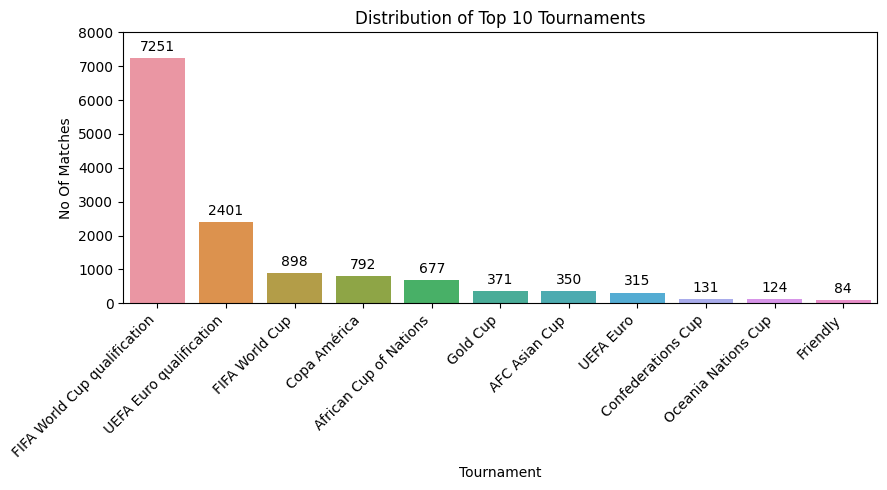

In [170]:
sns.set_palette("colorblind")
plt.figure(figsize=(9, 5))  # Adjust the figsize as needed

# Create a bar plot using Seaborn's barplot function
ax = sns.barplot(x=top_tournaments.index, y=top_tournaments.values)

# Remove the grid lines
ax.grid(False)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Add values on top of the bars
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate('{}'.format(int(height)),  # Use int() to remove decimal points
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Set y-axis limits to go up to 8000
ax.set_ylim(0, 8000)

# Add labels and title
plt.xlabel("Tournament")
plt.ylabel("No Of Matches")
plt.title("Distribution of Top 10 Tournaments")

# Show the plot
plt.tight_layout()
plt.show()

----

#### **Q** : Who is the best player, and can you provide the names of the top 10 players?

**Ans** : The best player is Cristiano Ronaldo with a total of 91 goals, and the next 9 are as follows:

In [171]:
# Group by player name and calculate the total goals scored
player_goals = id_goal_scorer_df.groupby('scorer')['minute'].count()

# Find the player with the highest goal count
best_player = player_goals.idxmax()
highest_goals = player_goals.max()

print(f"The best player is {best_player} with a total of {highest_goals} goals.\n")

# Display the goal count for top 10 players
player_goals_sorted = player_goals.sort_values(ascending=False)
print("Top 10 players by goals:")
top_players = player_goals_sorted.head(10)
print(top_players)


The best player is Cristiano Ronaldo with a total of 91 goals.

Top 10 players by goals:
scorer
Cristiano Ronaldo     91
Robert Lewandowski    56
Lionel Messi          54
Ali Daei              49
Miroslav Klose        48
Carlos Ruiz           47
Luis Suárez           46
Robbie Keane          44
Zlatan Ibrahimović    44
Harry Kane            44
Name: minute, dtype: int64


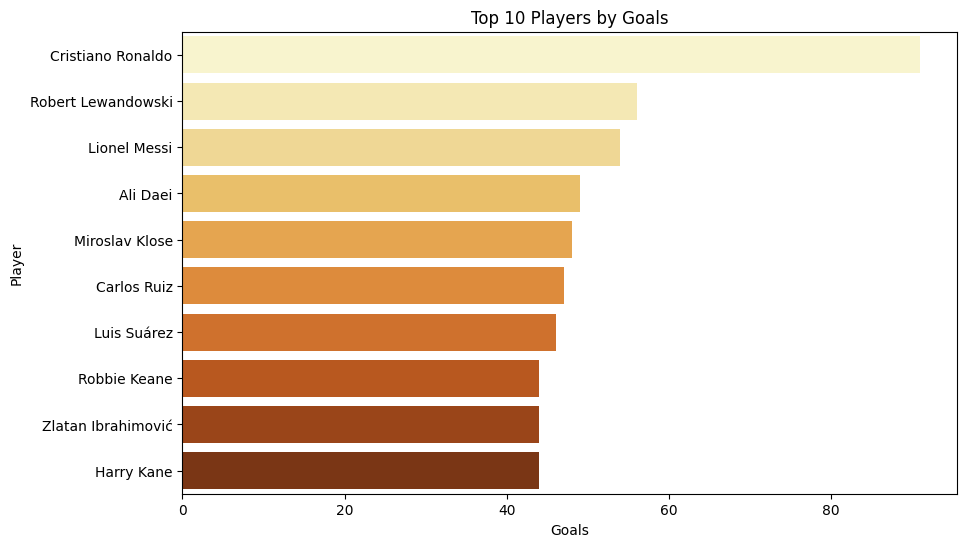

In [172]:
# Create a bar chart for the top 10 players
plt.figure(figsize=(10, 6))
sns.barplot(x=top_players.values, y=top_players.index, palette="YlOrBr")
plt.xlabel('Goals')
plt.ylabel('Player')
plt.title('Top 10 Players by Goals')
plt.show()


#### **Q**: Name the players and their count who scored a goal in their own goal?

**Ans** : The highest rate of own goal is **3** and the players who most own goals are as follows:

In [173]:
own_goal = id_goal_scorer_df[id_goal_scorer_df["own_goal"]== True]
own_goal= own_goal.scorer.value_counts()
own_goal[:9]

scorer
Roberto Ayala      3
Ragnar Klavan      3
José del Solar     3
Gustavo Gómez      3
Cristian Brolli    3
Ján Ďurica         3
Rashad Sadygov     3
Walid Abbas        3
Raio Piiroja       3
Name: count, dtype: int64

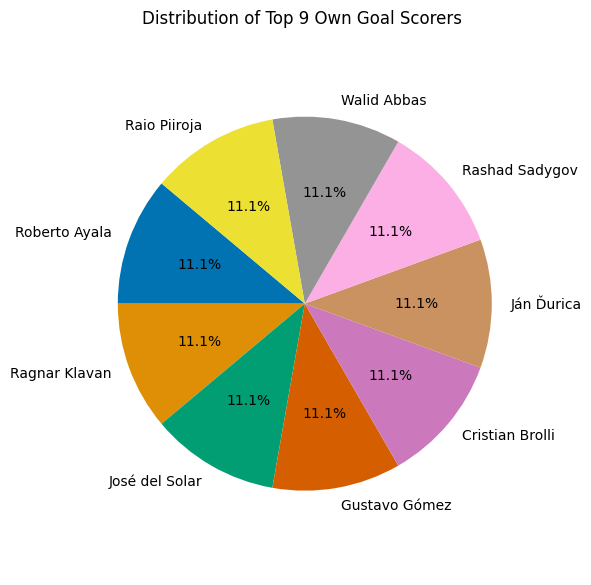

In [174]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named id_goal_scorer_df
own_goal = id_goal_scorer_df[id_goal_scorer_df["own_goal"] == True]
own_goal_count = own_goal["scorer"].value_counts()[:9]

plt.figure(figsize=(6, 6))  # Adjust the figsize as needed

# Create a pie chart
plt.pie(own_goal_count, labels=own_goal_count.index, autopct='%1.1f%%', startangle=140)

# Add title
plt.title("Distribution of Top 9 Own Goal Scorers ")

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()


#### **Q**: What is the minimum minute of goal? And how many players have scored a goal in minimum minute?

**Ans** : The minimum minute of goal is **1 min** and **189 players** who scored a goal in minimum minutes.

In [175]:
minimum_time_goal = id_goal_scorer_df.minute.min()  
minimum_time_goal
sorted_df = id_goal_scorer_df.sort_values(by='minute') 
Player_min_goal=sorted_df[sorted_df.minute==1].scorer.count()
print(f'Minimum minutes of goal: {minimum_time_goal}\nPlayers who scored a goal in minimum minutes:{Player_min_goal}')


Minimum minutes of goal: 1.0
Players who scored a goal in minimum minutes:189


#### **Q**: Identify how many penalties each team has received?

In [176]:
penalties =id_goal_scorer_df.groupby(["team"]).agg({"penalty":"count"}).sort_values('penalty', ascending = False)
penalties

,penalty
team,
Brazil,1046
Germany,934
Argentina,914
Spain,807
Netherlands,772
...,...
Saarland,4
Somalia,3
South Sudan,2


#### **Q**: Identify the top 9 teams that have received the fewest penalties?

In [177]:
top_9=penalties.sort_values('penalty')
top_9[:9]

,penalty
team,
French Guiana,2
Anguilla,2
South Sudan,2
Somalia,3
Yemen DPR,4
Saarland,4
Eritrea,4
São Tomé and Príncipe,5
Brunei,5


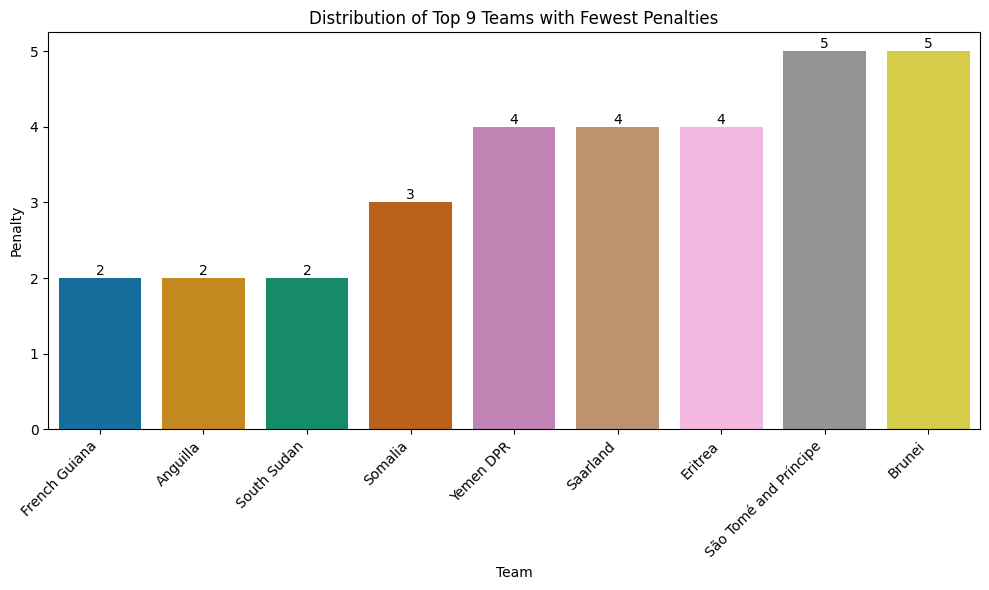

In [178]:
top_9 = penalties.sort_values('penalty')[:9]  # Sort and select the top 9 teams

# Set the color palette to "colorblind"
sns.set_palette("colorblind")

plt.figure(figsize=(10, 6))  # Adjust the figsize as needed

# Create a bar plot using Seaborn's barplot function
bars = sns.barplot(x=top_9.index, y=top_9['penalty'])

# Add labels and title
plt.xlabel("Team")
plt.ylabel("Penalty")
plt.title("Distribution of Top 9 Teams with Fewest Penalties")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add values on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', color='black')

# Show the plot
plt.tight_layout()
plt.show()


#### **Q**: Identify the bottom 10 teams that have received the most penalties?

In [179]:
bottom_10=penalties.sort_values('penalty')
bottom_10[-10:]

,penalty
team,
Italy,648
France,696
England,727
Uruguay,761
Mexico,763
Netherlands,772
Spain,807
Argentina,914
Germany,934


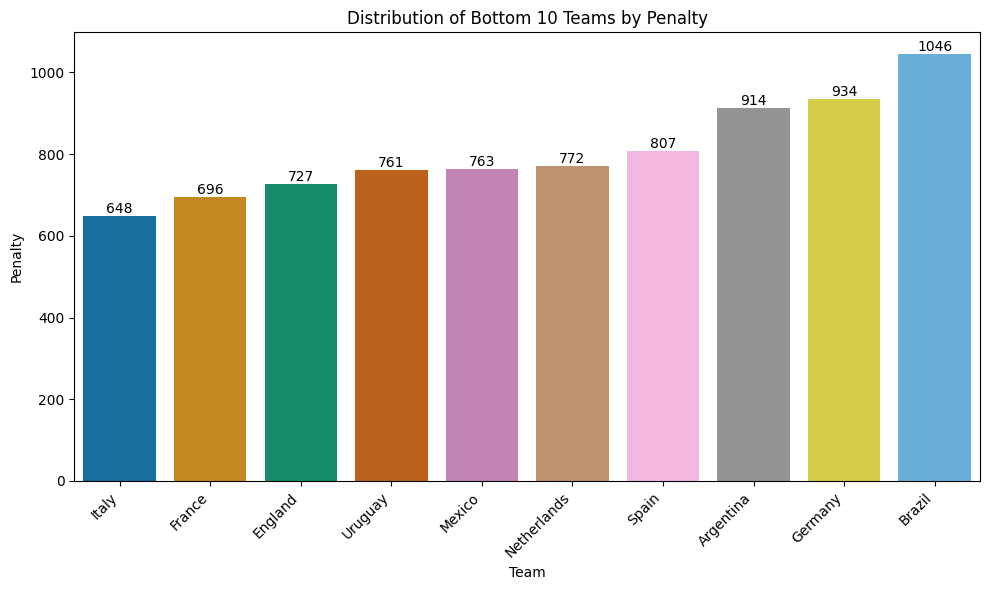

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

bottom_10 = penalties.sort_values('penalty')[-10:]

# Set the color palette to "colorblind"
sns.set_palette("colorblind")

plt.figure(figsize=(10, 6))  # Adjust the figsize as needed

# Create a bar plot using Seaborn's barplot function
bars = sns.barplot(x=bottom_10.index, y=bottom_10['penalty'])

# Add labels and title
plt.xlabel("Team")
plt.ylabel("Penalty")
plt.title("Distribution of Bottom 10 Teams by Penalty")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add values on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', color='black')

# Show the plot
plt.tight_layout()
plt.show()


#### **Q**: What are the most common scoring minutes? 

**Ans** : The most scoring minute is **90**.

In [181]:
scoring_minutes_counts = id_goal_scorer_df['minute'].value_counts()
sorted_scoring_minutes = scoring_minutes_counts.sort_values(ascending=False)
print(sorted_scoring_minutes)

minute
90.0     1606
45.0      835
89.0      643
75.0      571
88.0      569
         ... 
96.0        4
107.0       4
113.0       3
99.0        3
122.0       1
Name: count, Length: 121, dtype: int64


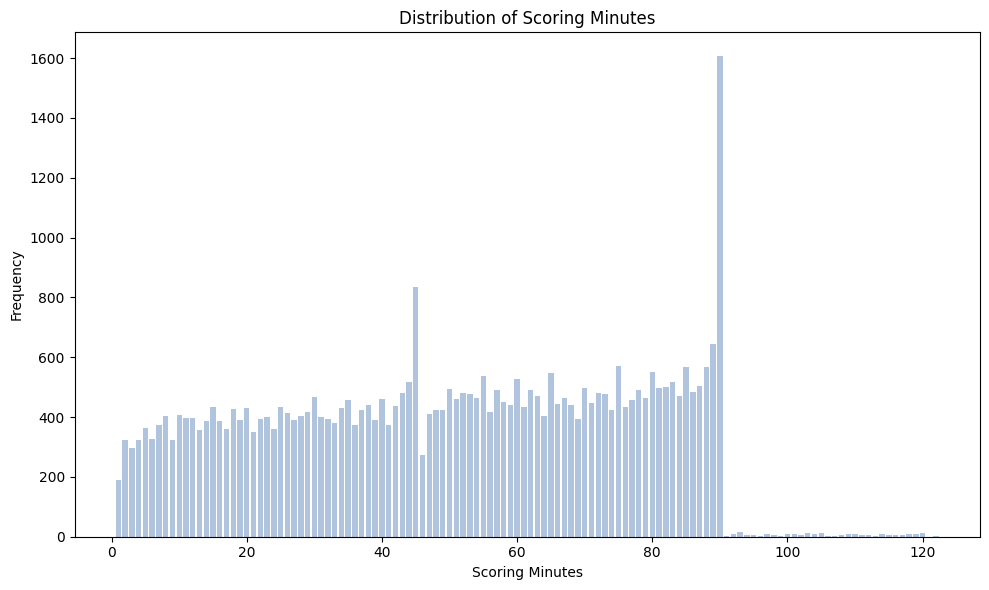

In [182]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(sorted_scoring_minutes.index, sorted_scoring_minutes.values, color='lightsteelblue')
plt.xlabel('Scoring Minutes')
plt.ylabel('Frequency')
plt.title('Distribution of Scoring Minutes')
plt.tight_layout()

# Display the histogram
plt.show()


#### **Q**: How many goals were scored through penalties?

**Ans** : Number of goals scored through penalties are **2697**

In [183]:
penalty_goals = id_goal_scorer_df[id_goal_scorer_df['penalty'] == True]
num_penalty_goals = len(penalty_goals)

print("Number of goals scored through penalties:", num_penalty_goals)

Number of goals scored through penalties: 2697


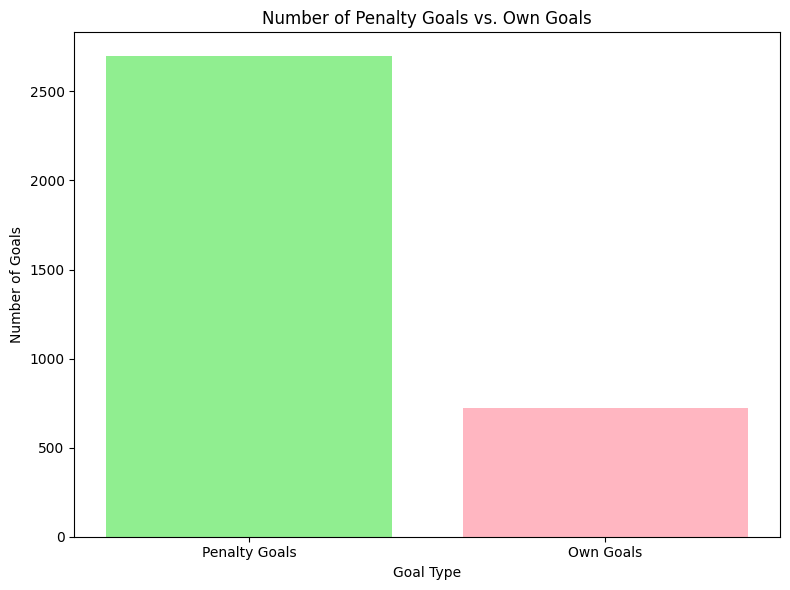

In [184]:
# Filter for penalty goals and own goals
penalty_goals = id_goal_scorer_df[id_goal_scorer_df['penalty'] == True]
own_goals = id_goal_scorer_df[id_goal_scorer_df['own_goal'] == True]

# Get the counts of penalty goals and own goals
num_penalty_goals = len(penalty_goals)
num_own_goals = len(own_goals)

# Create a bar chart with light green and light pink colors
labels = ['Penalty Goals', 'Own Goals']
values = [num_penalty_goals, num_own_goals]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['lightgreen', 'lightpink'])
plt.xlabel('Goal Type')
plt.ylabel('Number of Goals')
plt.title('Number of Penalty Goals vs. Own Goals')
plt.grid(False)  # Remove grid lines
plt.tight_layout()

# Display the bar chart
plt.show()


#### **Q**: What is the distribution of home and away scores? 


**Ans** : The distribution of home and away scores in the "id_shootouts_df" dataset illustrates the occurrence of scores by teams while playing at home and away. This analysis offers insights into match competitiveness and suggests that away teams tend to win more frequently, indicating a potential advantage for the visiting teams.

In [185]:
# Calculate the number of wins for each team as a home team
home_wins = id_shootouts_df[id_shootouts_df['winner'] == id_shootouts_df['home_team']]
home_team_wins = home_wins['home_team'].value_counts()

# Calculate the number of wins for each team as an away team
away_wins = id_shootouts_df[id_shootouts_df['winner'] == id_shootouts_df['away_team']]
away_team_wins = away_wins['away_team'].value_counts()

# Get the top 10 home and away teams with the most wins
top_10_home_teams = home_team_wins.head(10)
top_10_away_teams = away_team_wins.head(10)

# Create DataFrames to display the results
top_home_teams_df = pd.DataFrame({'Team': top_10_home_teams.index, 'Home Wins': top_10_home_teams.values})
top_away_teams_df = pd.DataFrame({'Team': top_10_away_teams.index, 'Away Wins': top_10_away_teams.values})

print("Top 10 Home Teams with Most Wins:")
print(top_home_teams_df)

print("\nTop 10 Away Teams with Most Wins:")
print(top_away_teams_df)

Top 10 Home Teams with Most Wins:
            Team  Home Wins
0         Zambia          9
1    South Korea          8
2   South Africa          8
3       Thailand          8
4          Kenya          8
5        Senegal          7
6      Argentina          7
7         Brazil          6
8        Uruguay          5
9  United States          5

Top 10 Away Teams with Most Wins:
          Team  Away Wins
0        Egypt          8
1    Argentina          7
2       Guinea          6
3       Uganda          6
4     Cameroon          6
5  South Korea          5
6  Ivory Coast          5
7     Colombia          5
8       Angola          5
9     Botswana          5


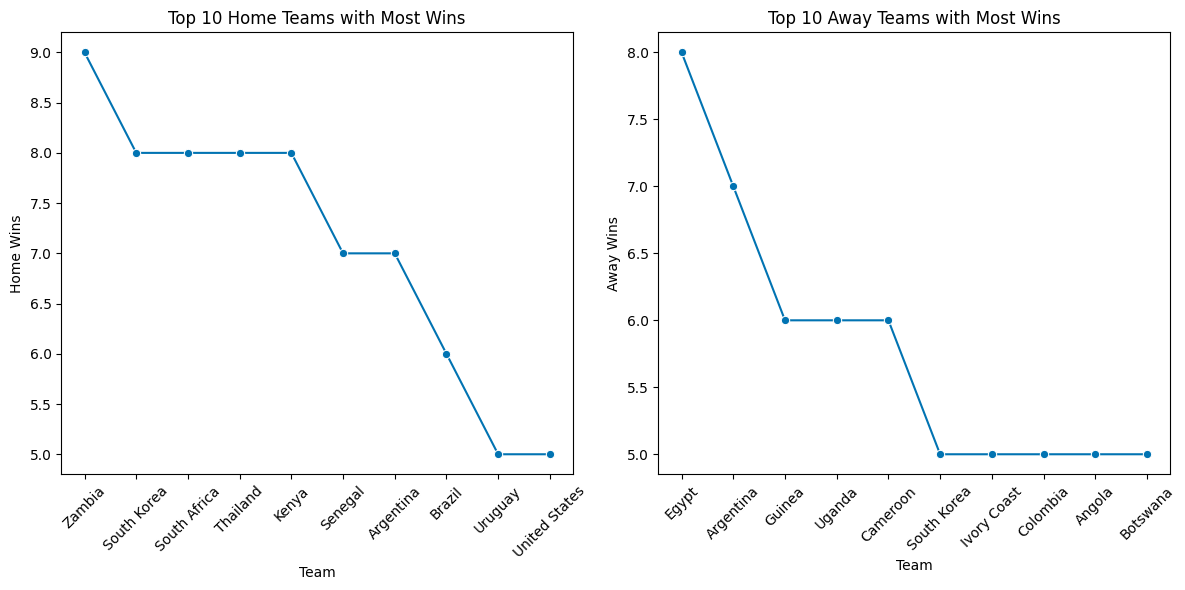

In [186]:
plt.figure(figsize=(12, 6))  # Set the figure size

# Line plot for top 10 home teams with most wins
plt.subplot(1, 2, 1)  # Create a subplot for home teams
sns.lineplot(x='Team', y='Home Wins', data=top_home_teams_df, marker='o')
plt.xticks(rotation=45)
plt.title('Top 10 Home Teams with Most Wins')

# Line plot for top 10 away teams with most wins
plt.subplot(1, 2, 2)  # Create a subplot for away teams
sns.lineplot(x='Team', y='Away Wins', data=top_away_teams_df, marker='o')
plt.xticks(rotation=45)
plt.title('Top 10 Away Teams with Most Wins')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

#### **Q**: Which teams won the most matches? 

**Ans** : Argentina won the most matches.

In [187]:
win_counts = id_shootouts_df['winner'].value_counts()
print(win_counts)

winner
Argentina        14
Egypt            13
South Korea      13
Zambia           13
South Africa     11
                 ..
Bangladesh        1
New Caledonia     1
Hong Kong         1
Israel            1
Puerto Rico       1
Name: count, Length: 162, dtype: int64


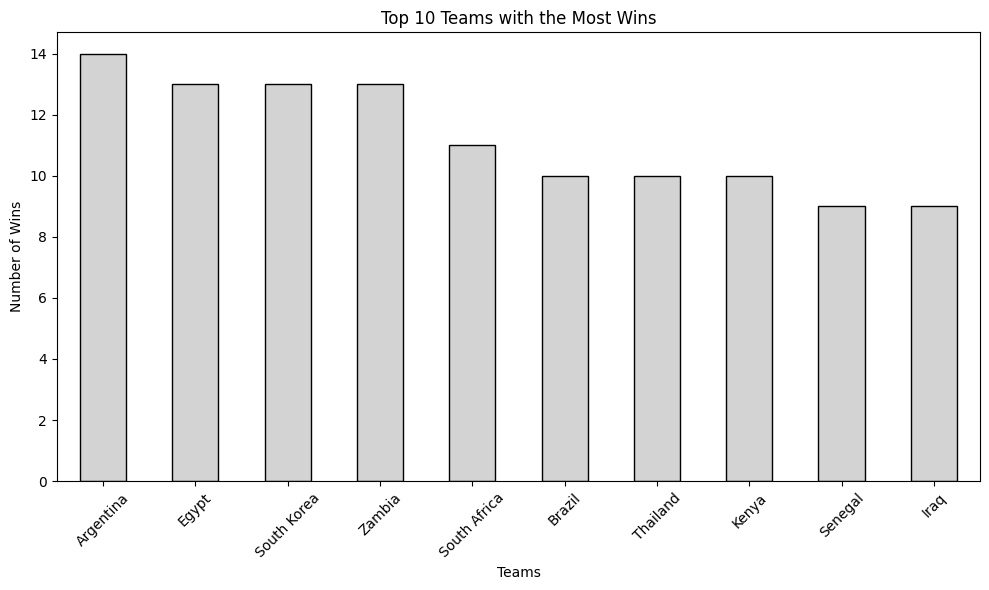

In [188]:
# Select the top 10 teams
top_10_win_counts = win_counts.head(10)

# Create a bar chart for the top 10 win counts
plt.figure(figsize=(10, 6))
top_10_win_counts.plot(kind='bar', color='lightgrey', edgecolor='black')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.title('Top 10 Teams with the Most Wins')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the bar chart
plt.show()

#### **Q**: Which cities and countries have hosted the most matches?

In [189]:
matches_per_city = valid_entries['city'].value_counts()
matches_per_country = valid_entries['country'].value_counts()

print("Cities with the most matches hosted:")
print(matches_per_city.head())

print("\nCountries with the most matches hosted:")
print(matches_per_country.head())

Cities with the most matches hosted:
city
Doha            180
Montevideo      173
Santiago        163
Lima            155
Buenos Aires    154
Name: count, dtype: int64

Countries with the most matches hosted:
country
United States    529
Brazil           280
France           272
Qatar            240
Germany          236
Name: count, dtype: int64


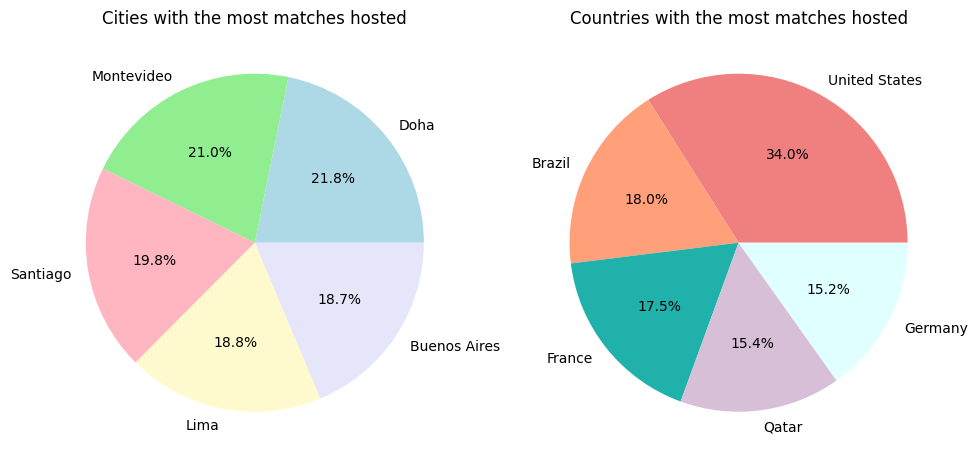

In [190]:
# Define light color names for the pie chart slices
city_colors = ['lightblue', 'lightgreen', 'lightpink', 'lemonchiffon', 'lavender']
country_colors = ['lightcoral', 'lightsalmon', 'lightseagreen', 'thistle', 'lightcyan']

plt.figure(figsize=(10, 6))  # Set the figure size

# Create a pie chart for cities
plt.subplot(1, 2, 1)  # Create a subplot for cities
plt.pie(matches_per_city.head(), labels=matches_per_city.head().index, autopct='%1.1f%%', colors=city_colors)
plt.title('Cities with the most matches hosted')

# Create a pie chart for countries
plt.subplot(1, 2, 2)  # Create a subplot for countries
plt.pie(matches_per_country.head(), labels=matches_per_country.head().index, autopct='%1.1f%%', colors=country_colors)
plt.title('Countries with the most matches hosted')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()